In [ ]:
# data processing libs
import pandas as pd
import numpy as np
# data vis libs

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [ ]:

cust_df = pd.read_csv('http://bit.ly/PMR-ch4')

In [ ]:
cust_df.shape

(1000, 12)

In [ ]:
cust_df.head()

,cust_id,age,credit_score,email,distance_to_store,online_visits,online_trans,online_spend,store_trans,store_spend,sat_service,sat_selection
0,0,46.719825,735.837331,yes,9.186310,0,0,0.000000,1,33.603505,NaN,NaN
1,1,39.283359,656.599440,yes,0.781894,46,18,352.735573,0,0.000000,2.0,2.0
2,2,33.574168,665.934422,yes,1.204119,64,21,355.833505,6,162.685187,4.0,4.0
3,3,43.564256,718.456166,yes,9.736359,29,11,186.594784,1,51.327653,2.0,3.0
4,4,31.358552,626.323897,yes,33.782715,0,0,0.000000,0,0.000000,NaN,NaN


In [ ]:
cust_df.isnull().sum()

cust_id                0
age                    0
credit_score           0
email                  0
distance_to_store      0
online_visits          0
online_trans           0
online_spend           0
store_trans            0
store_spend            0
sat_service          388
sat_selection        388
dtype: int64

In [ ]:
cust_df.corr()

,cust_id,age,credit_score,distance_to_store,online_visits,online_trans,online_spend,store_trans,store_spend,sat_service,sat_selection
cust_id,1.000000,0.016605,-0.017527,0.032520,0.004980,-0.001345,-0.003537,0.003211,0.018016,0.015505,0.038622
age,0.016605,1.000000,0.293173,0.018909,-0.050954,-0.050772,-0.050662,-0.045477,-0.024672,-0.026356,-0.063342
credit_score,-0.017527,0.293173,1.000000,0.053541,-0.015363,-0.013135,-0.008845,-0.041787,-0.024324,-0.018062,-0.013233
distance_to_store,0.032520,0.018909,0.053541,1.000000,-0.008321,-0.008004,-0.010778,-0.247095,-0.229249,0.011372,-0.002108
online_visits,0.004980,-0.050954,-0.015363,-0.008321,1.000000,0.992050,0.985861,0.058719,0.024198,-0.055680,0.043876
online_trans,-0.001345,-0.050772,-0.013135,-0.008004,0.992050,1.000000,0.994954,0.058749,0.025554,-0.049443,0.056386
online_spend,-0.003537,-0.050662,-0.008845,-0.010778,0.985861,0.994954,1.000000,0.060693,0.026421,-0.051517,0.056939
store_trans,0.003211,-0.045477,-0.041787,-0.247095,0.058719,0.058749,0.060693,1.000000,0.896367,0.000464,0.065107
store_spend,0.018016,-0.024672,-0.024324,-0.229249,0.024198,0.025554,0.026421,0.896367,1.000000,-0.013511,0.059270
sat_service,0.015505,-0.026356,-0.018062,0.011372,-0.055680,-0.049443,-0.051517,0.000464,-0.013511,1.000000,0.535021


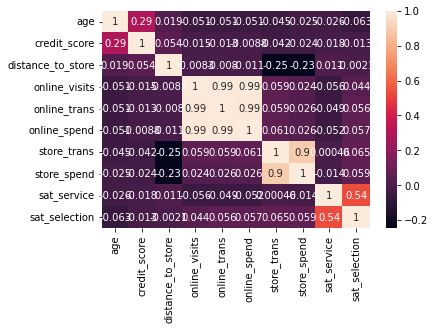

In [ ]:
df = cust_df.drop('cust_id',axis=1)

corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
stats.entropy

<function scipy.stats._distn_infrastructure.entropy>

In [ ]:
for name in cust_df:
  print(stats.entropy(cust_df[name].value_counts()))

6.907755278982134
6.907755278982134
6.907755278982134
0.49054387222964546
6.907755278982134
3.671148137466482
2.7465896114470634
4.546095401846194
1.535259990165126
4.608802054368712
1.4607210000428992
1.356432297032687


## Making simulated data

In [ ]:
n_cust = 1000
np.random.seed(21821)
cust_df = pd.DataFrame({'cust_id': pd.Categorical(range(n_cust))})
cust_df.head(4)

,cust_id
0,0
1,1
2,2
3,3


## Making columns with the following specs 
1- Age  ...just random normal data with mean=35 ,std=5 amd size= dataframe

2- Credict_score .... random normal data (but relate mean of the distribution to customer's age .Older customers having higher credit score on average. It can be done by mean*age + offset value

3- Email .... Categorical with numpy random.choice of 'yes' and 'no' 
              with 0.8,0.2 probabilities

4- Distance to store...take the expnonential of the of the np.random.normal distribution



In [ ]:
# using numpy random.normal function to make age data
# loc =mean age , scale = std
cust_df['age'] =np.random.normal(loc=35, scale=5, size=n_cust)

cust_df['credit_score']=np.random.normal(loc= 3*cust_df.age +620 , scale=50 , size=n_cust)

cust_df['email'] = pd.Categorical(np.random.choice(a=['yes', 'no'],
p=[0.8, 0.2], size=n_cust))

cust_df['distance_to_store'] = np.random.lognormal(mean=2,sigma=1.2,size=n_cust)



### 5- Online visits : 
Use negative binomial for this.  The negative binomial takes n and p as shape parameters, where n is the target number of successes, sometimes referred to
as the dispersion parameter as it sets the degree of dispersion in the samples, and p is the probability of a single success. An
alternative parameterization using the mean is more intuitive: p = n / (n + mean). We model the mean (mu) of the
negative binomial with a baseline value of 15. We add an average 15 online visits for customers who have an email on file
((cust_df.email == ’yes’) * 15). Finally, we add or subtract visits from the target mean based on the customer’s
age relative to the sample median; customers who are younger are simulated to make more online visits. We then calculate
prob using mu and n

Note :The difference is that with a regular binomial distribution, you’re looking at the number of successes. With a negative binomial distribution, it’s the number of failures that counts. 


In [ ]:
mu = 15 + ((cust_df.email == 'yes') * 15 - 0.7 * (cust_df.age - cust_df.age.median()))
n = 0.3
prob = n / (n + mu)
cust_df['online_visits'] = np.random.negative_binomial(n=0.3,p=prob,size=n_cust)

6- Online Trans :
Just the opposite of the online visits..ie just use the binomial dist

7- Online spend:
Just the exponential of the online trans..i.e use lognormal

In [ ]:
cust_df['online_trans'] = np.random.binomial(n=cust_df.online_visits,p=0.3,size=n_cust)
cust_df['online_spend'] = np.random.lognormal(mean=3,sigma=0.1,size=n_cust)

In [ ]:
mu =3/ np.sqrt(cust_df.distance_to_store)
n = 5
prob = n / (n + mu)
cust_df['store_trans'] = np.random.negative_binomial(n=n,
p=prob,
size=n_cust)
cust_df['store_spend'] = (np.exp(np.random.normal(loc=3.5,
scale=0.4,
size=n_cust))
* cust_df.store_trans)

In [ ]:
sat_overall =pd.Series(np.random.normal(size=n_cust , loc=3.1,scale=0.7))

In [ ]:
sat_service = np.floor(sat_overall + np.random.normal(loc=0.5,
scale=0.4,
size=n_cust))
sat_selection = np.floor(sat_overall + np.random.normal(loc=-0.2,
scale=0.6,
size=n_cust))
sat_service.describe()

count    1000.000000
mean        3.118000
std         0.861869
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         6.000000
dtype: float64

In [ ]:
sat_service[sat_service > 5] = 5
sat_service[sat_service < 1] = 1
sat_selection[sat_selection > 5] = 5
sat_selection[sat_selection < 1] = 1
sat_service.describe()

count    1000.000000
mean        3.117000
std         0.859098
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
dtype: float64

In [ ]:
no_response = np.random.binomial(n=1,
p=cust_df.age/100,
size=n_cust).astype(bool)
sat_service[no_response] = np.nan
sat_selection[no_response] = np.nan
sat_service.describe()

count    612.000000
mean       3.081699
std        0.860018
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
dtype: float64

In [ ]:
cust_df['sat_service'] = sat_service
cust_df['sat_selection'] = sat_selection
cust_df.describe()

,age,credit_score,distance_to_store,online_visits,online_trans,online_spend,store_trans,store_spend,sat_service,sat_selection
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,612.000000,612.000000
mean,34.933972,725.224636,15.765725,29.693000,8.906000,20.195010,1.274000,44.729630,3.081699,2.431373
std,5.070098,50.152653,26.808774,58.749198,17.693451,2.094543,1.694637,62.723694,0.860018,0.913723
min,16.413932,561.349990,0.082841,0.000000,0.000000,14.883197,0.000000,0.000000,1.000000,1.000000
25%,31.498928,692.097950,3.570304,0.000000,0.000000,18.838084,0.000000,0.000000,3.000000,2.000000
50%,35.042813,727.263135,7.451220,6.000000,2.000000,20.130194,1.000000,27.633063,3.000000,2.000000
75%,38.437630,758.936799,17.274832,30.250000,10.000000,21.438761,2.000000,62.613808,4.000000,3.000000
max,50.523265,872.288340,352.723643,626.000000,187.000000,27.629922,19.000000,547.976139,5.000000,5.000000


In [ ]:
cust_df.dtypes

cust_id              category
age                   float64
credit_score          float64
email                category
distance_to_store     float64
online_visits           int64
online_trans            int64
online_spend          float64
store_trans             int64
store_spend           float64
sat_service           float64
sat_selection         float64
dtype: object

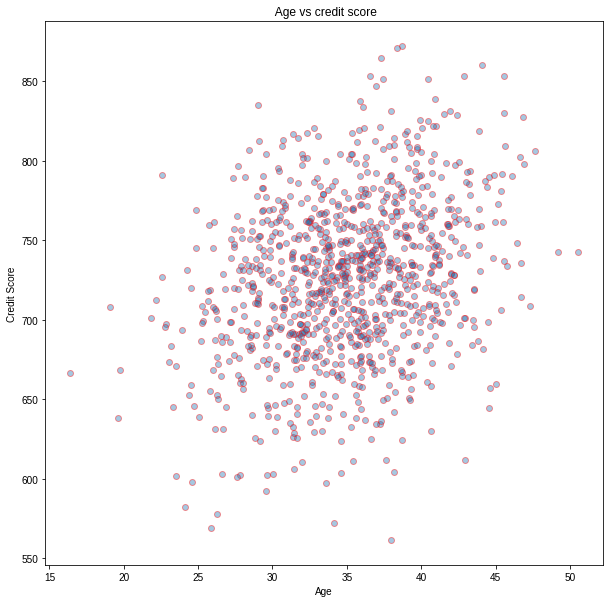

In [ ]:
# plot between age and credit score
fig , axx =plt.subplots(figsize=(10,10))
axx.scatter(x='age', y='credit_score',data=cust_df,alpha=0.4 , edgecolors='red')
axx.set_xlabel('Age')
axx.set_ylabel('Credit Score')
axx.set_title(' Age vs credit score')
plt.style.use('seaborn-ticks')
plt.show()

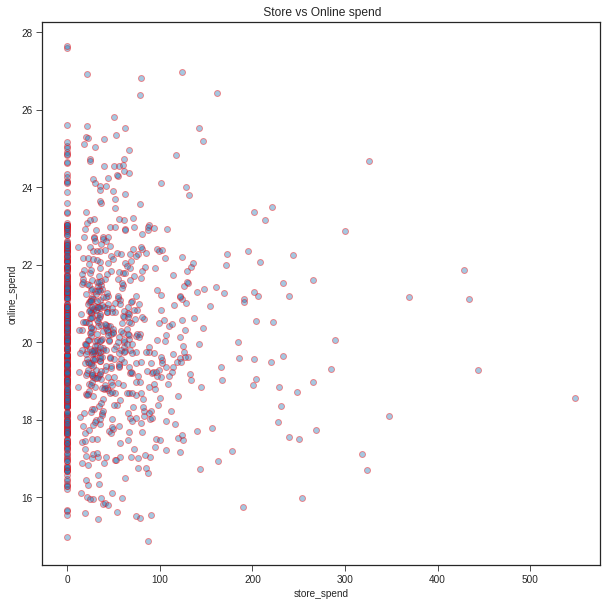

In [ ]:
# plot between age and credit score
fig , axx =plt.subplots(figsize=(10,10))
axx.scatter(x='store_spend', y='online_spend',data=cust_df,alpha=0.4 , edgecolors='red',c=None)
axx.set_xlabel('store_spend')
axx.set_ylabel('online_spend')
axx.set_title(' Store vs Online spend')

plt.show()

Text(0, 0.5, 'Count of customers')

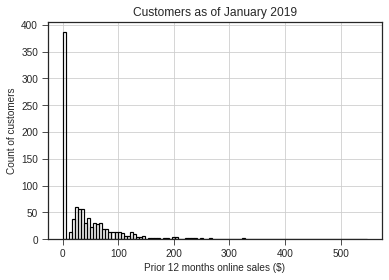

In [ ]:
cust_df.store_spend.hist(bins=100,
edgecolor='k',
facecolor='none',
linewidth=1.2)
plt.title('Customers as of January 2019')
plt.xlabel('Prior 12 months online sales ($)')
plt.ylabel('Count of customers')

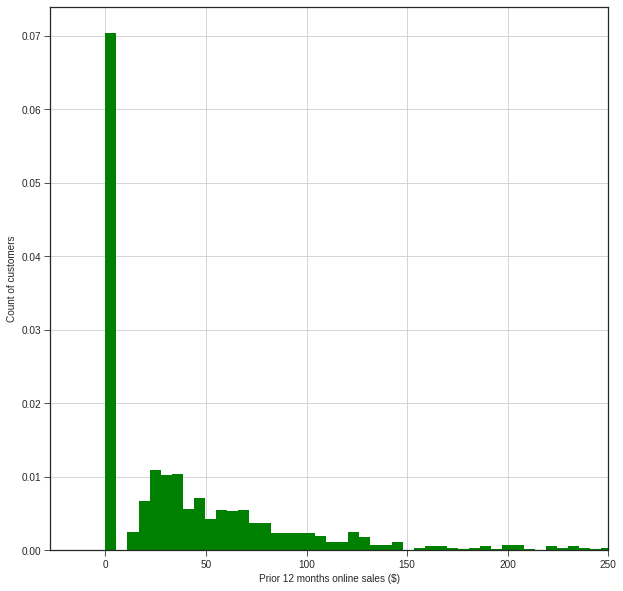

In [ ]:
fig,axx=plt.subplots(figsize=(10,10))
axx.hist(x=cust_df.store_spend, bins=100, rwidth=3,color='green',density=True,log=False)
axx.set_xlabel('Prior 12 months online sales ($)')
axx.set_ylabel('Count of customers')
axx.set_xlim(right=250)
axx.grid()
plt.show()

**edge_mapper =**

{'yes': 'g',
'no': 'k'}

**fill_mapper =**

{'yes': 'none',
'no': 'k' }

In [ ]:
for name , group in cust_df.groupby('email'):
  print(name)

no
yes


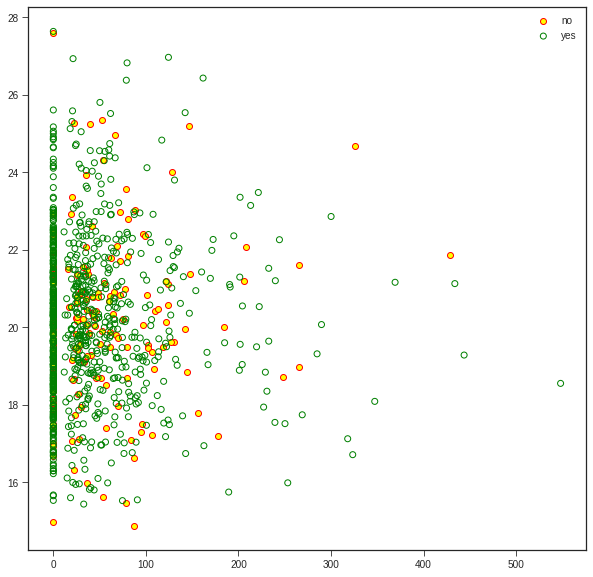

In [ ]:
#plt.scatter(edgecolors= , c=)
edgecolors_dict={'yes' : 'g' , 'no' : 'red'}
c_dict={'yes' : 'none' , 'no' : 'yellow'}
fig , axx= plt.subplots(figsize=(10,10))

for name ,group in cust_df.groupby('email'):
  axx.scatter(x=group.store_spend, y=group.online_spend , edgecolors=edgecolors_dict[name] , c=c_dict[name],label=name)

  axx.legend()
  
plt.show()



### Note : For legend we need to fill the label field in the plot

# using Log

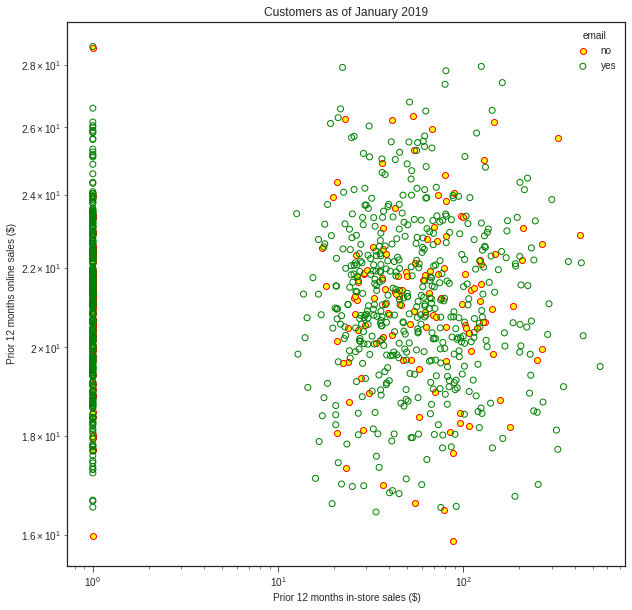

In [ ]:
#plt.scatter(edgecolors= , c=)
edgecolors_dict={'yes' : 'g' , 'no' : 'red'}
c_dict={'yes' : 'none' , 'no' : 'yellow'}
fig , axx= plt.subplots(figsize=(10,10))

for name ,group in cust_df.groupby('email'):
  axx.scatter(x=group.store_spend +1 , y=group.online_spend +1, edgecolors=edgecolors_dict[name] , c=c_dict[name],label=name)

axx.legend()
plt.legend(title='email')
plt.title('Customers as of January 2019')
plt.xlabel('Prior 12 months in-store sales ($)')
plt.ylabel('Prior 12 months online sales ($)')
axx.set_xscale('log')
axx.set_yscale('log')

## Note : In above graph In this code, we plot . . . spend + 1 to avoid an error due to the fact that log(0) is not defined. 
In the right hand side of above Figure, the axes are now logarithmic; for instance, the
distance from 1–10 is the same as 10–100.

# Plotting the following in same grid
1- cust_df.distance_to_store - online_spend

2- cust_df.distance_to_store - store_spend

3 - 4 same above but with log scale

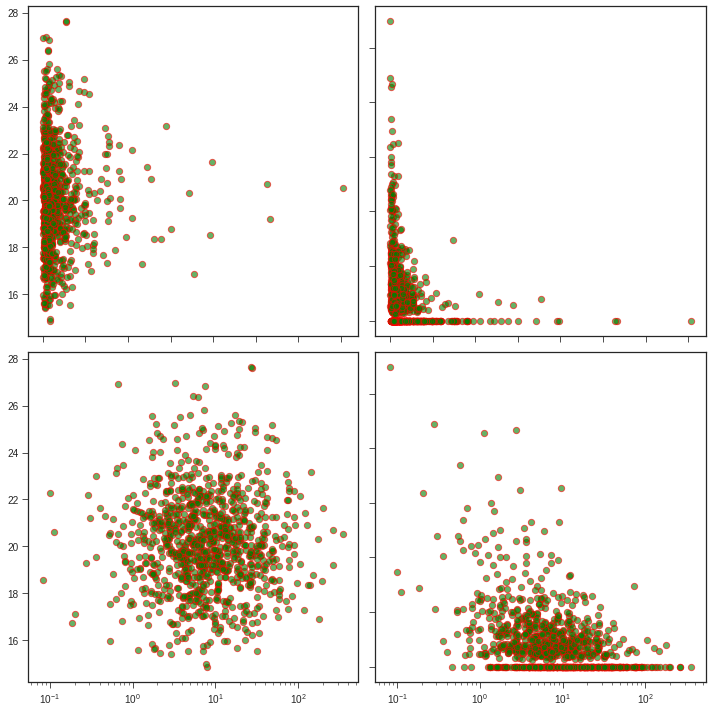

In [ ]:
fig , axx = plt.subplots(2,2,figsize=(10,10))
axx[0,0].scatter( cust_df.distance_to_store , cust_df.online_spend , c='green' , edgecolor='red',alpha=0.6,s=40)
axx[0,1].scatter( cust_df.distance_to_store , cust_df.store_spend, c='green' , edgecolor='red',alpha=0.6,s=40)

axx[1,0].scatter( cust_df.distance_to_store , cust_df.online_spend , c='green' , edgecolor='red',alpha=0.6,s=40)
axx[1,0].set_xscale('log')
axx[1,1].scatter( cust_df.distance_to_store , cust_df.store_spend , c='green' , edgecolor='red',alpha=0.6,s=40)
axx[1,1].set_xscale('log')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axx.flat:
    ax.label_outer()
plt.tight_layout()

# Pair Grid

In [ ]:
#Pair grid of these columns : age', 'distance_to_store','store_spend', 'email'
cust_df.head()

,cust_id,age,credit_score,email,distance_to_store,online_visits,online_trans,online_spend,store_trans,store_spend,sat_service,sat_selection
0,0,46.719825,735.837331,yes,9.186310,0,0,17.044181,1,33.603505,NaN,NaN
1,1,39.283359,656.599440,yes,0.781894,46,18,19.596421,0,0.000000,2.0,2.0
2,2,33.574168,665.934422,yes,1.204119,64,21,16.944453,6,162.685187,4.0,4.0
3,3,43.564256,718.456166,yes,9.736359,29,11,16.963162,1,51.327653,3.0,3.0
4,4,31.358552,626.323897,yes,33.782715,0,0,19.701109,0,0.000000,NaN,NaN


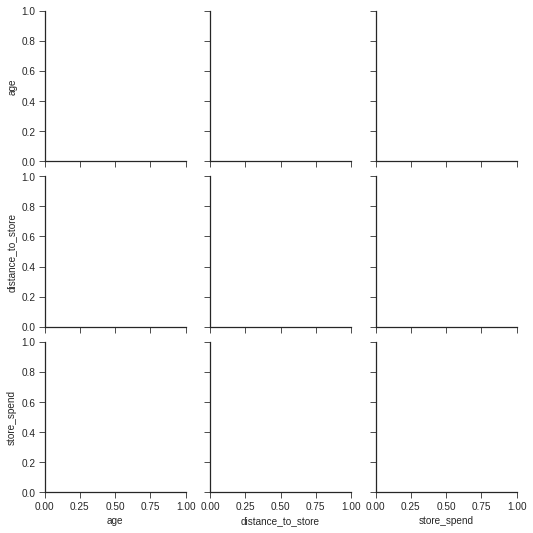

In [ ]:
g= sns.PairGrid(data=cust_df[['age', 'distance_to_store','store_spend', 'email']],height=2.5,palette='Set2') 

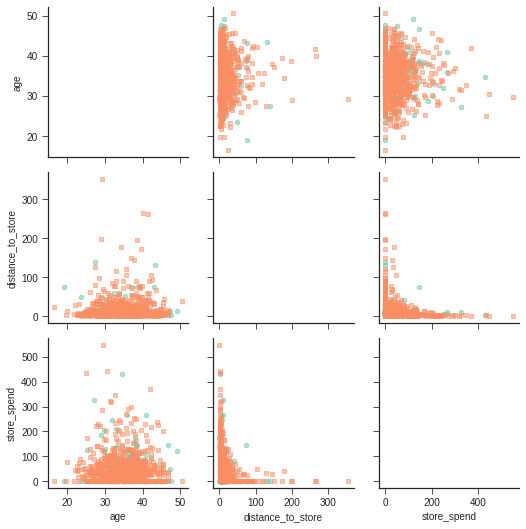

In [ ]:
g = sns.PairGrid(cust_df[['age', 'distance_to_store','store_spend', 'email']],height=2.5,hue='email', palette='Set2',hue_kws={"marker": ['o', 's']})
_ = g.map_offdiag(plt.scatter, s=20, alpha=0.5)

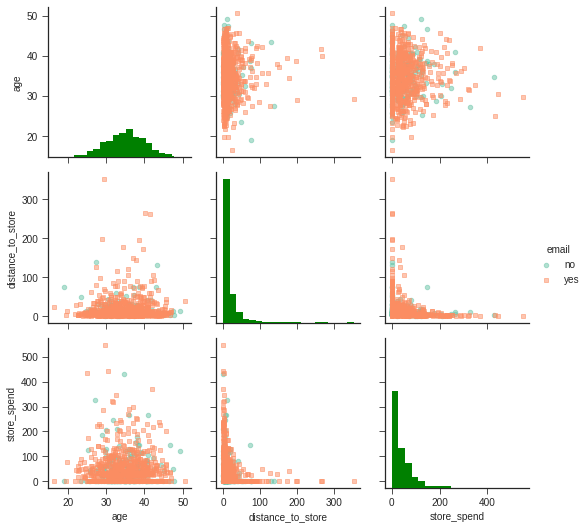

In [ ]:
g = sns.PairGrid(cust_df[['age', 'distance_to_store','store_spend', 'email']],height=2.5,hue='email', palette='Set2',hue_kws={"marker": ['o', 's']})
_ = g.map_offdiag(plt.scatter, s=20, alpha=0.5)
_ = g.map_diag(plt.hist, bins=20,color='green')
_ = g.add_legend()


# Covariance 
It provides insight into how two variables are related to one another. More precisely, covariance refers to the measure of how two random variables in a data set will change together. A positive covariance means that the two variables at hand are positively related, and they move in the same direction
# Another explanation
We can find the mean value for each variable and then, 

for each
observation, measure whether each variable is higher or lower than its mean value. 

Covariance measures the degree to which
both variables are higher or lower than the mean at the same time. 





A positive covariance indicates that their patterns match,
and a negative covariance indicate that their patterns are offset, i.e. when one is higher than its mean the other is lower its
mean.

In [ ]:
np.cov(cust_df.age, cust_df.credit_score)

array([[  25.70589016,   74.54758431],
       [  74.54758431, 2515.28862282]])

If values xi and yi tend to go in the same direction—to be both higher or both lower than their respective means—across
observations, then they have a positive covariance. If cov(x, y) is zero, then there is no (linear) association between xi and
yi . As mentioned above, negative covariance means that the variables go in opposite directions relative to their means: when
xi is lower, yi tends to be higher.